In [ ]:
#TODO--1. Extract all the features to be like training data
#------2. Use linear regression to examine feature correlations(what's correlated to Median Personal Earnings)
#------3. Use Linear regression to predict future trends of some features(Median Personal Earnings;labored force)

# Feature Engineering

Load the preprocessed data files into notebook. Form features.

In [1]:
import matplotlib.pyplot as plt
#a median personal earnings prediction linear regression model only for MA
import pandas as pd
mpe = pd.read_csv("data/Median Personal Earnings.csv")
#These features for training
atse = pd.read_csv("data/Ability to speak English.csv")
cs = pd.read_csv("data/Citizenship.csv")
ea = pd.read_csv("data/Educational Attainment.csv")
ms = pd.read_csv("data/Marital Status.csv")
ps= pd.read_csv("data/Poverty Status.csv")
ye = pd.read_csv("data/Year Of Entry.csv")
lf = pd.read_csv("data/labor_female.csv")
lm = pd.read_csv("data/labor_male.csv")
uf = pd.read_csv("data/unemploymentFemale.csv")
um = pd.read_csv("data/unemploymentMale.csv")

Median Personal Earnings

In [2]:
import numpy as np
mpe=mpe.iloc[:,1:]
mpewithneg=mpe.loc[(mpe['State Code']=='Median Personal Earnings')]

y=np.array(mpewithneg['25'])
y

array([19800., 19000., 19000., 20000., 20000., 18000., 20000., 20000.,
       24000., 20000., 25000., 24700., 24500., 25000., 25000.])

People can speak English(percentage)

In [3]:
#this is the proportion of people who can speak english
a=list(atse['25'])
x1=[]
for i in range(0,len(a),2):
    tmp=a[i]/a[i+1]
    if tmp>1:
        x1.append(np.mean(x1))
    else:
        x1.append(tmp)
x1=np.array(x1).reshape(len(x1),1)

Citizenship(percentage)

In [4]:
#this is the proportion of citizenship(is a citizen/the whole)
cs
a=list(cs['25'])
x2=[]
for i in range(0,len(a),2):
    tmp=a[i]/(a[i]+a[i+1])
    x2.append(tmp)
x2=np.array(x2).reshape(len(x2),1)

Year of Entry(after 2000s percentage)

In [5]:
#this is the proportion of year of entry(after 2000s/whole)
ye
a=list(ye['25'])
x4=[]
for i in range(0,len(a),2):
    tmp=a[i+1]/(a[i]+a[i+1])
    x4.append(tmp)
x4=np.array(x4).reshape(len(x4),1)

Labored Female

In [6]:
#this is the number of labored female
x5=np.array(lf.iloc[22])
for i in range(len(x5)):
    x5[i]=float(x5[i])
x5=x5[1:]
x5=x5.reshape(len(x5),1)

Labored Male

In [7]:
#this is the number of labored male
x6=np.array(lm.iloc[22])
for i in range(len(x6)):
    x6[i]=float(x6[i])
x6=x6[1:]
x6=x6.reshape(len(x6),1)

Unemployed Female

In [8]:
#this is the number of unemployment female
x7=np.array(uf.iloc[22])
for i in range(len(x7)):
    x7[i]=float(x7[i])
x7=x7[1:]
x7=x7.reshape(len(x7),1)

Unemployed Male

In [9]:
#this is the number of unemployment male
x8=np.array(um.iloc[22])
for i in range(len(x8)):
    x8[i]=float(x8[i])
x8=x8[1:]
x8=x8.reshape(len(x8),1)

In [10]:
#all female
af=np.sum([x5,x7],axis=0)
#all male
am=np.sum([x6,x8],axis=0)
#female employed rate
fe=np.true_divide(x5,af).reshape((len(x5),1))
#male employed rate
me=np.true_divide(x6,am).reshape((len(x6),1))
#all employed rate
aa=np.sum([af,am],axis=0)
ae=np.sum([x5,x6],axis=0)
g=np.true_divide(ae,aa).reshape((len(ae),1))

<ipython-input-11-66893da57f7a>:14: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.plot(np.arange(2005,2020).astype(dtype=np.str),df['male'],marker='o',label='male')
<ipython-input-11-66893da57f7a>:15: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.plot(np.arange(2005,2020).astype(dtype=np.str),df['female'],marker='o',label='female')
<ipython-input-1

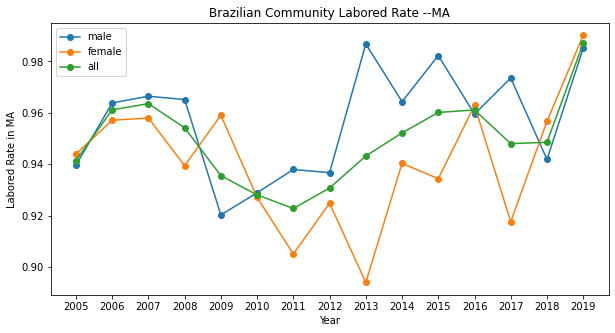

In [11]:
#predict income
x=np.array([2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]).reshape((15,1))
df=pd.DataFrame()
df['year']=x.reshape(len(x))
df['male']=me
df['female']=fe
df['all']=g
#df['year']=df['year'].astype('int64')

plt.figure(figsize=(10,5))
plt.xlabel('Year')
plt.ylabel('Labored Rate in MA')
plt.title("Brazilian Community Labored Rate --MA")
plt.plot(np.arange(2005,2020).astype(dtype=np.str),df['male'],marker='o',label='male')
plt.plot(np.arange(2005,2020).astype(dtype=np.str),df['female'],marker='o',label='female')
plt.plot(np.arange(2005,2020).astype(dtype=np.str),df['all'],marker='o',label='all')
plt.legend()
plt.savefig("Brazilian Labored Rate--MA.png")

Poverty Status(percentage)

In [12]:
#x9 will be above_poverty/above_poverty+below_poverty, right now I won't consider Not_determined
ps
a=list(ps['25'])
x9=[]
for i in range(0,len(a),3):
    tmp=a[i+1]/(a[i]+a[i+1])
    #tmp=a[i+1]/(a[i]+a[i+1]+a[i+2])
    x9.append(tmp)
x9=np.array(x9).reshape((len(x9),1))

In [13]:
#x10 should be about Marital status

Labored Force(percentage)

In [14]:
#what if combining female and male together
#so that x5,x6,x7,x8 becomes one x5: labored/whole
#a=np.sum([x5,x6],axis=0)
#b=np.sum([x7,x8],axis=0)
#c=np.sum([a,b],axis=0)
#d=np.true_divide(a,c).reshape((len(d),1))
#d
a=np.sum([x5,x6],axis=0)
b=np.sum([x7,x8],axis=0)
c=np.sum([a,b],axis=0)
d=np.true_divide(a,c).reshape((len(c),1))

# Correlation Analysis--for Median Personal Earnings

Combine the features

x1-proportion of people who can speak english

x2-proportion of citizenship(is a citizen/the whole)

x3-

x4-proportion of year of entry(after 2000s/whole)

x5-number of labored female

x6-number of labored male

x7-unemployment female

x8-unemployment male

x9-above_poverty/above_poverty+below_poverty

d-Labored Force/labored+unemployed

y-Median Personal Earnings

In [15]:
y1=y.reshape((len(y),1))
data=np.hstack([x1,x2,x4,d,x9,y1])

df=pd.DataFrame(data)
df.columns=['English','Citizenship','Entry','Labored','Poverty','Income']
df=df.astype('float')

df["Income"].corr(df["Citizenship"])

df["Income"].corr(df["English"])

df["Income"].corr(df["Entry"])

0.4990063593846584

In [16]:
df["Income"].corr(df["Labored"])

df["Income"].corr(df["Poverty"])

0.04438632348363138

In [17]:
X=np.hstack([x2,x4,d])
#X=np.hstack([x1,x2,d])
#X=np.hstack([x2])
#X=np.hstack([x1,d,x9])
#X=np.hstack([d])

X= X.astype(np.float64) 
X

array([[0.1333642 , 0.57156087, 0.94142781],
       [0.1406825 , 0.60008706, 0.96118634],
       [0.13008262, 0.66038319, 0.96355755],
       [0.18146648, 0.62171858, 0.95420095],
       [0.17537625, 0.60681707, 0.93554251],
       [0.16635179, 0.64971798, 0.9280459 ],
       [0.19679536, 0.66879041, 0.92276952],
       [0.30648351, 0.58406068, 0.93072195],
       [0.22864403, 0.61797171, 0.94320509],
       [0.2994959 , 0.66322518, 0.95217106],
       [0.33035612, 0.63542503, 0.96015097],
       [0.32482675, 0.62141645, 0.96111864],
       [0.25101235, 0.69220958, 0.94802505],
       [0.29781441, 0.73492063, 0.94852307],
       [0.24701199, 0.81036838, 0.98712206]])

In [18]:
contain_nan = (True in np.isnan(X))
contain_nan

False

In [19]:
def maxminnorm(array):
    maxcols=array.max(axis=0)
    mincols=array.min(axis=0)
    data_shape = array.shape
    data_rows = data_shape[0]
    data_cols = data_shape[1]
    t=np.empty((data_rows,data_cols))
    for i in range(data_cols):
        t[:,i]=(array[:,i]-mincols[i])/(maxcols[i]-mincols[i])
    return t
X1=maxminnorm(X)
X1

array([[0.01638551, 0.        , 0.28993861],
       [0.05292706, 0.11945267, 0.59697447],
       [0.        , 0.3719411 , 0.63382156],
       [0.25656843, 0.21003406, 0.48842561],
       [0.22615888, 0.1476344 , 0.19848459],
       [0.1810982 , 0.32728079, 0.08199186],
       [0.33310818, 0.40714611, 0.        ],
       [0.88079999, 0.05234263, 0.12357601],
       [0.49213406, 0.19434415, 0.31755658],
       [0.84590964, 0.38384184, 0.4568823 ],
       [1.        , 0.26742947, 0.58088543],
       [0.97239093, 0.20876892, 0.59592244],
       [0.60382291, 0.50521322, 0.39245576],
       [0.83751365, 0.68406461, 0.40019484],
       [0.58384847, 1.        , 1.        ]])

In [20]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
standard_scaler = preprocessing.StandardScaler()
X2 = standard_scaler.fit_transform(X)
X2

array([[-1.34900917, -1.30627008, -0.48379552],
       [-1.24393095, -0.82659703,  0.74856094],
       [-1.39612706,  0.18729317,  0.8964549 ],
       [-0.6583434 , -0.46285922,  0.31287606],
       [-0.74578857, -0.71343073, -0.85086648],
       [-0.87536427,  0.00795567, -1.31843586],
       [-0.43824704,  0.32866208, -1.64752837],
       [ 1.13668588, -1.09608348, -1.15152867],
       [ 0.01904499, -0.5258635 , -0.37294467],
       [ 1.03635582,  0.23508168,  0.18626998],
       [ 1.47945534, -0.23238277,  0.68398403],
       [ 1.40006319, -0.4679395 ,  0.74433838],
       [ 0.34021548,  0.72245947, -0.07232022],
       [ 1.01221245,  1.4406535 , -0.04125771],
       [ 0.28277732,  2.70932073,  2.36619321]])

In [21]:
import statsmodels.api as sm
X_intercept = sm.add_constant(X2)
#y is y

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X_intercept,
        y,
        test_size=4,
        random_state=0
    )

model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     10.64
Date:                Mon, 06 Dec 2021   Prob (F-statistic):            0.00533
Time:                        16:45:17   Log-Likelihood:                -93.226
No. Observations:                  11   AIC:                             194.5
Df Residuals:                       7   BIC:                             196.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.169e+04    440.753     49.210      0.0

C:\Users\HP\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [23]:
results.params

array([21689.28008477,  1718.63869826,   601.2832624 ,   798.12062312])

In [24]:

ypred = results.predict(X_test)
from sklearn.metrics import mean_squared_error, confusion_matrix
print(ypred)
print(y_test)
print("RMSE on testing set = ", mean_squared_error(y_test, ypred))

[19651.83517428 19818.78440872 21108.16378795 23760.41790055]
[19000. 20000. 24000. 20000.]
RMSE on testing set =  5740296.912262317


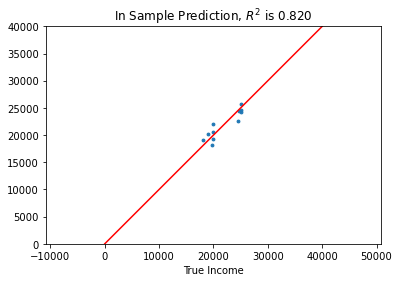

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score

plt.figsize=(8, 5)
y_is_predict = results.predict(X_train)
plt.scatter(y_train, y_is_predict, s = 8)
r2_train = r2_score(y_train, y_is_predict)
plt.xlabel('True Income')
plt.plot([0,40000],[0,40000],'r-')
plt.axis('equal')
plt.ylim([0,40000])
plt.xlim([0,40000])
plt.title(f'In Sample Prediction, $R^2$ is {r2_train:0.3f}');

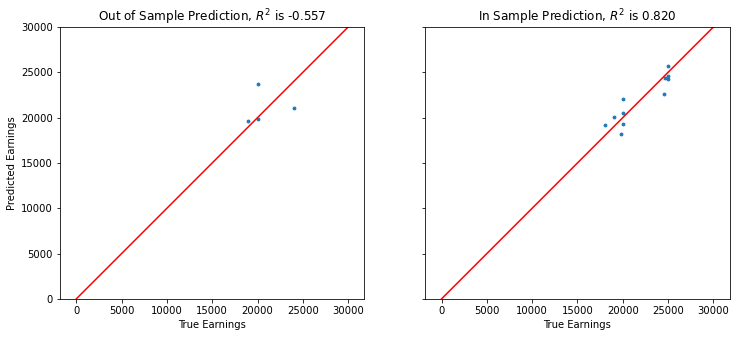

In [26]:
%matplotlib inline
from sklearn.metrics import r2_score

fig, (ax1, ax2) = plt.subplots(1,2,sharey = 'row', figsize=(12, 5))
y_oos_predict = results.predict(X_test)
r2_test = r2_score(y_test, y_oos_predict)
ax1.scatter(y_test, y_oos_predict, s = 8)
ax1.set_xlabel('True Earnings')
ax1.set_ylabel('Predicted Earnings')
ax1.plot([0,30000], [0,30000], 'r-')
ax1.axis('equal')
ax1.set_ylim([0, 30000])
ax1.set_xlim([0, 30000])
ax1.set_title(f'Out of Sample Prediction, $R^2$ is {r2_test:0.3f}')
#
y_is_predict = results.predict(X_train)
ax2.scatter(y_train, y_is_predict, s = 8)
r2_train = r2_score(y_train, y_is_predict)
ax2.set_xlabel('True Earnings')
ax2.plot([0,30000],[0,30000],'r-')
ax2.axis('equal')
ax2.set_ylim([0,30000])
ax2.set_xlim([0,30000])
ax2.set_title(f'In Sample Prediction, $R^2$ is {r2_train:0.3f}');

Conclusion: 

x2-proportion of citizenship(is a citizen/the whole)

x4-proportion of people who entry after 2000s

d-Labored Force/labored+unemployed

These features are correlated to Median Personal Income.

In [27]:
eo = pd.read_csv("data/Employment by Occupation.csv")
eo

,Unnamed: 0,Year,Type,State Code,1,2,4,5,6,8,...,49,51,53,55,31,46,50,54,38,56
0,56,2005,Employment by Occupation,Management & Professional,857.0,0.0,395.0,222.0,9966.0,249.0,...,1034.0,2814.0,880.0,619.0,NaN,NaN,NaN,NaN,NaN,NaN
1,57,2005,Employment by Occupation,Services,623.0,0.0,0.0,156.0,4154.0,613.0,...,428.0,1552.0,965.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,58,2005,Employment by Occupation,Sales and Office,161.0,0.0,367.0,385.0,4484.0,332.0,...,502.0,302.0,550.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN
3,59,2005,Employment by Occupation,Construction and Extracion,0.0,88.0,0.0,0.0,673.0,0.0,...,0.0,1364.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,60,2005,Employment by Occupation,Maintenance and Repair,238.0,0.0,0.0,0.0,64.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,61,2019,Employment by Occupation,"Production, Transportation and Material Moving",45.0,0.0,131.0,0.0,4032.0,236.0,...,122.0,211.0,85.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN
146,62,2019,Employment by Occupation,Educational Instruction and Library Occupations,0.0,0.0,352.0,0.0,2474.0,478.0,...,138.0,472.0,466.0,0.0,121.0,NaN,0.0,0.0,NaN,NaN
147,63,2019,Employment by Occupation,"Arts, Design, Entertainment, Sports, and Media...",128.0,0.0,248.0,0.0,3216.0,131.0,...,193.0,85.0,43.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN
148,64,2019,Employment by Occupation,Healthcare Practitioner and Technical Occupations,0.0,0.0,226.0,0.0,1070.0,137.0,...,0.0,50.0,259.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN


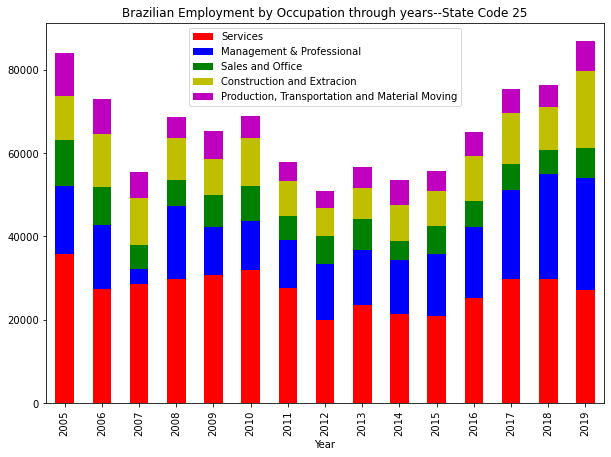

In [28]:
import matplotlib.pyplot as plt
import numpy as np
def eoForState(statecode):
    s=str(statecode)
    eoMA=eo[['Year','State Code',s]]
    top5eoMA=eoMA.groupby('Year')[['State Code',s]].apply(lambda x:x.sort_values(by=[s],ascending=False)[:5]).reset_index()
    fig, ax = plt.subplots(figsize=(10,7))  
    plt.title("Brazilian Employment by Occupation through years--State Code "+s)
    State_Code = top5eoMA['State Code'].drop_duplicates()
    margin_bottom = np.zeros(len(top5eoMA['Year'].drop_duplicates()))
    colors = ["r", "b","g",'y','m']

    for num, month in enumerate(State_Code):
        values = list(top5eoMA[top5eoMA['State Code'] == month].loc[:, s])

        top5eoMA[top5eoMA['State Code'] == month].plot.bar(x='Year',y=s, ax=ax, stacked=True, 
                                    bottom = margin_bottom, color=colors[num], label=month)
        margin_bottom += values
    plt.savefig('MA Brazilian Employment by Occupation through years.png')
    plt.show()
eoForState(25)

In [29]:
#As we can see from the graph, services is the most significant part of employment
#is the proportion of services and management&professional correlated to personal income/poverty/labored rate/English profiency?

In [30]:
#10 rows for each year
eoMA=eo[['Year','State Code','25']]
eoMA

,Year,State Code,25
0,2005,Management & Professional,16245.0
1,2005,Services,35904.0
2,2005,Sales and Office,10976.0
3,2005,Construction and Extracion,10546.0
4,2005,Maintenance and Repair,641.0
...,...,...,...
145,2019,"Production, Transportation and Material Moving",7244.0
146,2019,Educational Instruction and Library Occupations,1985.0
147,2019,"Arts, Design, Entertainment, Sports, and Media...",1327.0
148,2019,Healthcare Practitioner and Technical Occupations,2015.0


In [31]:
#services/all occupations
a=list(eoMA['25'])
x10=[]
for i in range(0,len(a),10):
    tmp=a[i+1]/(a[i]+a[i+1]+a[i+2]+a[i+3]+a[i+4]+a[i+5]+a[i+6]+a[i+7]+a[i+8]+a[i+9])
    x10.append(tmp)
x10=np.array(x10).reshape(len(x10),1)
x10

array([[0.40547958],
       [0.36156657],
       [0.49216187],
       [0.41899496],
       [0.44404364],
       [0.43799342],
       [0.43844301],
       [0.36442323],
       [0.3810691 ],
       [0.36916867],
       [0.34616907],
       [0.36199329],
       [0.36832442],
       [0.36512821],
       [0.29008196]])

In [32]:
#tech/all occupations
a=list(eoMA['25'])
x11=[]
for i in range(0,len(a),10):
    tmp=a[i+8]/(a[i]+a[i+1]+a[i+2]+a[i+3]+a[i+4]+a[i+5]+a[i+6]+a[i+7]+a[i+8]+a[i+9])
    x11.append(tmp)
x11=np.array(x11).reshape(len(x11),1)
x11

array([[0.02439382],
       [0.00224248],
       [0.00604261],
       [0.00227906],
       [0.0074029 ],
       [0.01073191],
       [0.02063522],
       [0.01315575],
       [0.01707709],
       [0.01022052],
       [0.03014611],
       [0.01581454],
       [0.01269058],
       [0.0160928 ],
       [0.02150297]])

In [33]:
y1=y.reshape((len(y),1))
data=np.hstack([x1,x2,x4,d,x9,y1,x10,x11])

df=pd.DataFrame(data)
df.columns=['English','Citizenship','Entry','Labored','Poverty','Income','Service','Tech']
df=df.astype('float')

df["Income"].corr(df["English"])

-0.05710263863952608

In [34]:
df["Income"].corr(df["Citizenship"])

0.6865582276227539

In [35]:
df["Income"].corr(df["Entry"])

0.4990063593846584

In [36]:
df["Income"].corr(df["Labored"])

0.45772800136890224

In [37]:
df["Income"].corr(df["Poverty"])

0.04438632348363138

In [38]:
df["Income"].corr(df["Service"])

-0.678619674893651

In [39]:
df["Income"].corr(df["Tech"])

0.5556517893340301

In [40]:
X=np.hstack([x2,x4,d,x10,x11])
X= X.astype(np.float64) 
X

array([[0.1333642 , 0.57156087, 0.94142781, 0.40547958, 0.02439382],
       [0.1406825 , 0.60008706, 0.96118634, 0.36156657, 0.00224248],
       [0.13008262, 0.66038319, 0.96355755, 0.49216187, 0.00604261],
       [0.18146648, 0.62171858, 0.95420095, 0.41899496, 0.00227906],
       [0.17537625, 0.60681707, 0.93554251, 0.44404364, 0.0074029 ],
       [0.16635179, 0.64971798, 0.9280459 , 0.43799342, 0.01073191],
       [0.19679536, 0.66879041, 0.92276952, 0.43844301, 0.02063522],
       [0.30648351, 0.58406068, 0.93072195, 0.36442323, 0.01315575],
       [0.22864403, 0.61797171, 0.94320509, 0.3810691 , 0.01707709],
       [0.2994959 , 0.66322518, 0.95217106, 0.36916867, 0.01022052],
       [0.33035612, 0.63542503, 0.96015097, 0.34616907, 0.03014611],
       [0.32482675, 0.62141645, 0.96111864, 0.36199329, 0.01581454],
       [0.25101235, 0.69220958, 0.94802505, 0.36832442, 0.01269058],
       [0.29781441, 0.73492063, 0.94852307, 0.36512821, 0.0160928 ],
       [0.24701199, 0.81036838, 0.

In [41]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
standard_scaler = preprocessing.StandardScaler()
X2 = standard_scaler.fit_transform(X)
import statsmodels.api as sm
X_intercept = sm.add_constant(X2)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X_intercept,
        y,
        test_size=4,
        random_state=0
    )

model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     5.484
Date:                Mon, 06 Dec 2021   Prob (F-statistic):             0.0426
Time:                        16:45:30   Log-Likelihood:                -92.380
No. Observations:                  11   AIC:                             196.8
Df Residuals:                       5   BIC:                             199.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.168e+04    492.899     43.979      0.0

C:\Users\HP\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [42]:
ypred = results.predict(X_test)
from sklearn.metrics import mean_squared_error, confusion_matrix
print(ypred)
print(y_test)
print("RMSE on testing set = ", mean_squared_error(y_test, ypred))

[19008.6402604  20556.40652091 21310.829627   23278.92989805]
[19000. 20000. 24000. 20000.]
RMSE on testing set =  4573170.360491886


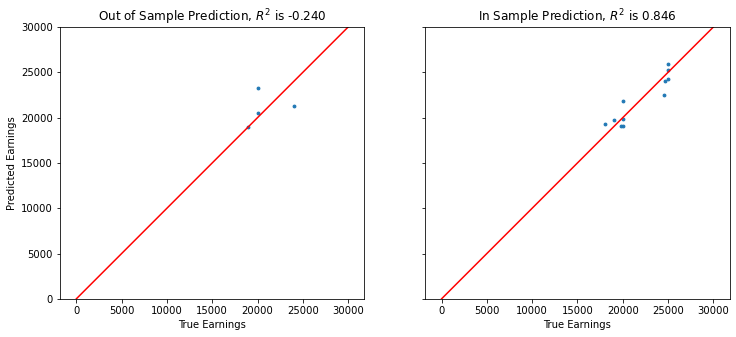

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score

fig, (ax1, ax2) = plt.subplots(1,2,sharey = 'row', figsize=(12, 5))
y_oos_predict = results.predict(X_test)
r2_test = r2_score(y_test, y_oos_predict)
ax1.scatter(y_test, y_oos_predict, s = 8)
ax1.set_xlabel('True Earnings')
ax1.set_ylabel('Predicted Earnings')
ax1.plot([0,30000], [0,30000], 'r-')
ax1.axis('equal')
ax1.set_ylim([0, 30000])
ax1.set_xlim([0, 30000])
ax1.set_title(f'Out of Sample Prediction, $R^2$ is {r2_test:0.3f}')
#
y_is_predict = results.predict(X_train)
ax2.scatter(y_train, y_is_predict, s = 8)
r2_train = r2_score(y_train, y_is_predict)
ax2.set_xlabel('True Earnings')
ax2.plot([0,30000],[0,30000],'r-')
ax2.axis('equal')
ax2.set_ylim([0,30000])
ax2.set_xlim([0,30000])
ax2.set_title(f'In Sample Prediction, $R^2$ is {r2_train:0.3f}');

Conclusion: it seems that other than year of entry, citizenship and labored rate, personal income can be positively correlated with the proportion of the medical technology industry, and negatively correlated with the proportion of the service industry, and services can be more effective as it is the industry most engaged in by the Brazilian community.

# Trends Predictions

1. Predict next 3 years Personal Earnings

In [128]:
#predict income
x=np.array([2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]).reshape((18,1))

In [149]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
standard_scaler = preprocessing.StandardScaler()
x1 = standard_scaler.fit_transform(x)
x_intercept = sm.add_constant(x1)
xtrain=x_intercept[:15]
xtest=x_intercept[15:]

In [171]:
ytrain=y
model = sm.OLS(ytrain, xtrain)
results = model.fit()
print(results.summary())

ypred=results.predict(xtest)
ypred

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     31.85
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           8.02e-05
Time:                        11:56:47   Log-Likelihood:                -129.91
No. Observations:                  15   AIC:                             263.8
Df Residuals:                      13   BIC:                             265.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.236e+04    410.114     54.519      0.0

C:\Users\HP\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


array([25648.57142857, 26154.64285714, 26660.71428571])

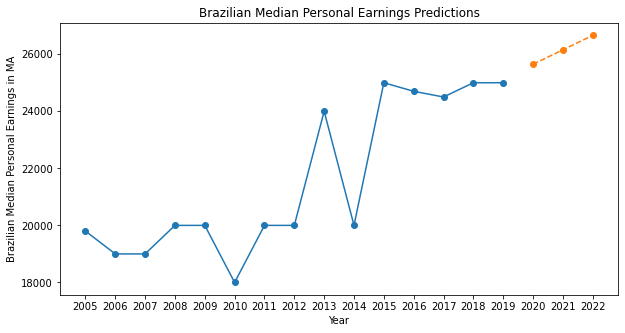

In [172]:
yall=np.hstack([ytrain,ypred])

plt.figure(figsize=(10,5))
plt.xlabel('Year')
plt.ylabel('Brazilian Median Personal Earnings in MA')
plt.title("Brazilian Median Personal Earnings Predictions")
plt.plot(np.arange(2005,2020).astype(dtype=np.str),yall[:15],marker='o')
plt.plot(np.arange(2020,2023).astype(dtype=np.str),yall[15:],marker='o',linestyle='dashed')
plt.savefig("Brazilian Median Personal Earnings Predictions--MA.png")

2. Predict Labor Rate

In [163]:
ytrain=d
ytrain=np.array(ytrain,dtype='float')

In [164]:
model = sm.OLS(ytrain, xtrain)
results = model.fit()
print(results.summary())

ypred=results.predict(xtest)
ypred

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     1.522
Date:                Mon, 15 Nov 2021   Prob (F-statistic):              0.239
Time:                        11:54:52   Log-Likelihood:                 41.543
No. Observations:                  15   AIC:                            -79.09
Df Residuals:                      13   BIC:                            -77.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9510      0.004    213.530      0.0

C:\Users\HP\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


array([0.95879599, 0.95999741, 0.96119884])

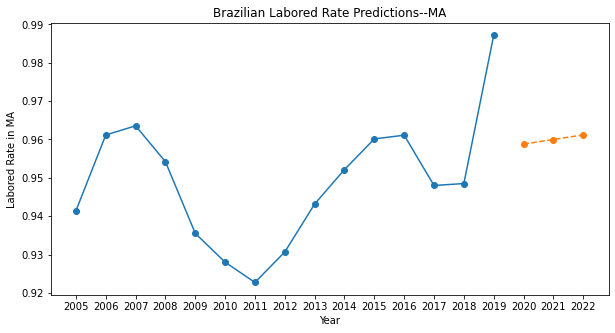

In [170]:
ytrain=ytrain.reshape(len(ytrain))
yall=np.hstack([ytrain,ypred])
df=pd.DataFrame()
df['year']=x.reshape(len(x))
df['income']=yall

df['year']=df['year'].astype('int64')

plt.figure(figsize=(10,5))
plt.xlabel('Year')
plt.ylabel('Labored Rate in MA')
plt.title("Brazilian Labored Rate Predictions--MA")
plt.plot(np.arange(2005,2020).astype(dtype=np.str),yall[:15],marker='o')
plt.plot(np.arange(2020,2023).astype(dtype=np.str),yall[15:],marker='o',linestyle='dashed')
plt.savefig("Brazilian Labored Rate Predictions--MA.png")